## Insurance Forecast using Regression models

In [1]:
# importing libraries

import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

In [2]:
# importing the dataset
df = pd.read_csv('insurance.csv')

# viewing top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning and Feature Engineering

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no NAN in the data

In [4]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# encoding
Male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, Male], axis=1 )

smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, smoker], axis=1 )

region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis=1 )

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


## Data Visualization

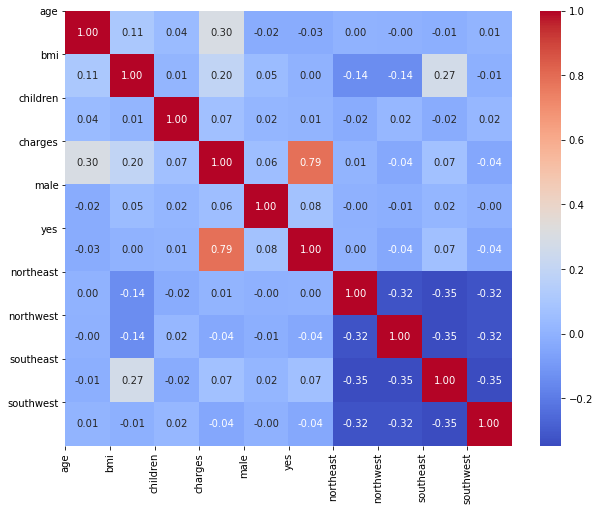

In [8]:
corr = df.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


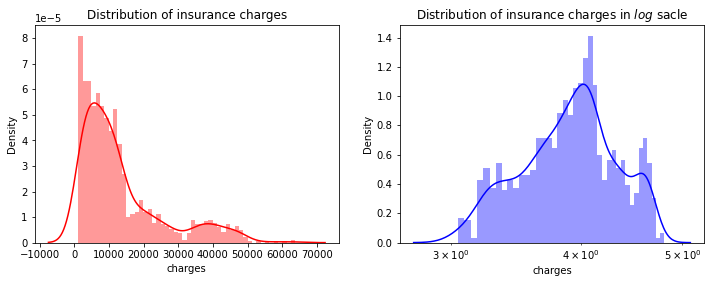

In [9]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

In [10]:
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [11]:
X=df.drop('charges', axis=1)  # independent variable
y=df['charges'] # dependent variable

In [61]:
# splitting the dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [62]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1070, 9)
Shape of X_test:  (268, 9)
Shape of y_train:  (1070,)
Shape of y_test (268,)


# AUTOENCODER

In [84]:
# Autoencoder parameters
epochs = 50
batch_size = 128
input_dim = X_train.shape[1]
encoding_dim = 5
hidden_dim = int(encoding_dim / 2)
# select learning rate - if it doesn't converge try a bigger number
learning_rate = 1e-3
# Autoencoder layers
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [85]:
autoencoder.fit(X_train, X_train,
                   epochs=epochs,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_data=(X_test, X_test),
                   verbose=1)

Epoch 1/50
9/9 [==============================] - 1s 38ms/step - loss: 122.3689 - val_loss: 125.0611
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 121.7210 - val_loss: 124.9301
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 121.6177 - val_loss: 124.8661
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 121.5622 - val_loss: 124.8234
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 121.5232 - val_loss: 124.7921
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 121.4999 - val_loss: 124.7620
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 121.5055 - val_loss: 124.7340
Epoch 8/50
9/9 [==============================] - 0s 10ms/step - loss: 121.5226 - val_loss: 124.7061
Epoch 9/50
9/9 [==============================] - 0s 10ms/step - loss: 121.5032 - val_loss: 124.6777
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 121.4608 - val_loss: 

#### PREDICTIONS

In [57]:
encoded_data = encoder.predict(x_test)
encoded_data

array([[ 2976.7432 ,     0.     ,     0.     ,  1144.5967 ,     0.     ],
       [ 1724.5887 ,     0.     ,     0.     ,   658.2637 ,     0.     ],
       [ 9602.5    ,     0.     ,     0.     ,  3723.026  ,     0.     ],
       [ 3044.704  ,     0.     ,     0.     ,  1170.4277 ,     0.     ],
       [11035.058  ,     0.     ,     0.     ,  4296.3687 ,     0.     ],
       [ 1477.7551 ,     0.     ,     0.     ,   562.342  ,     0.     ],
       [  690.7309 ,     0.     ,     0.     ,   260.90604,     0.     ],
       [ 4652.7144 ,     0.     ,     0.     ,  1791.6416 ,     0.     ],
       [ 1221.9506 ,     0.     ,     0.     ,   466.33963,     0.     ],
       [ 3359.3818 ,     0.     ,     0.     ,  1292.0118 ,     0.     ],
       [ 5970.3564 ,     0.     ,     0.     ,  2317.3416 ,     0.     ],
       [ 2373.4211 ,     0.     ,     0.     ,   909.89514,     0.     ],
       [ 1289.0181 ,     0.     ,     0.     ,   491.29443,     0.     ],
       [15093.3955 ,     0.     ,     

In [77]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
print(mse)

1150    125.286278
82      192.136093
336     420.587913
446     440.442490
1124    239.483293
           ...    
1149    288.731184
451     144.389499
833     447.790180
287     460.273634
557     230.720939
Length: 268, dtype: float64
